Project Title: Bio-Fertilizer Recommendation System for Sustainable Agriculture

Problem Statement: The overuse of chemical fertilizers in agriculture has resulted in high farming expenses, water contamination, and soil damage.  Farmers frequently abuse fertilizer and degrade soil health because they are not properly guided on which fertilizer is best for certain crops, soil, and seasonal conditions.  Compost, manure, and vermicompost are examples of biofertilizers that provide a sustainable substitute; nevertheless, there is no straightforward method for recommending them.  In order to assist farmers use less chemicals, save money, and implement sustainable farming methods, an AI-powered recommendation system is required to identify appropriate bio-fertilizers.

Project Description: This project focuses on developing an AI-powered Bio-Fertilizer Recommendation System to promote sustainable agriculture. The system takes input parameters such as soil nutrients (N, P, K, pH, etc.), crop type, and seasonal conditions, and then applies machine learning techniques to recommend the most suitable bio-fertilizer (e.g., compost, manure, vermicompost, Rhizobium).

The workflow of the project includes data preprocessing, feature encoding, and model training using classification algorithms like Random Forest. The model is trained on a modified crop–fertilizer dataset, where chemical fertilizers are mapped to bio-fertilizer equivalents. A simple Streamlit-based web application is also developed, allowing users to enter crop and soil details and instantly receive fertilizer recommendations.

By guiding farmers towards bio-fertilizer use, this project aims to reduce dependence on chemical inputs, improve soil fertility, lower farming costs, and promote eco-friendly farming practices, aligning with the vision of green skills and sustainable agriculture.

In [ ]:
import pandas as pd
# Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE


In [ ]:
crop_df = pd.read_csv(
    r"C:\Users\DELL\Desktop\AiMl\AICT intenship\Crop-and-Fertilizer-Recommendation-System-main\Datasets\Crop_recommendation.csv"
)

fert_df = pd.read_csv(
    r"C:\Users\DELL\Desktop\AiMl\AICT intenship\Crop-and-Fertilizer-Recommendation-System-main\Datasets\fertilizer.csv",
    encoding='latin1'
)

print("Crop Dataset Shape:", crop_df.shape)
print("Fertilizer Dataset Shape:", fert_df.shape)

In [17]:
crop_to_biofert = {
    "rice": "Compost",
    "wheat": "Vermicompost",
    "maize": "Farmyard Manure",
    "millet": "Rhizobium",
    "barley": "Azospirillum",
    # Add other crop labels as needed
}

data = crop_df.copy()

if 'label' in data.columns:
    data["BioFertilizer"] = data["label"].map(crop_to_biofert)
    data["BioFertilizer"] = data["BioFertilizer"].fillna("Compost")  # Avoid warnings
else:
    data["BioFertilizer"] = "Compost"

print("Prepared Dataset Shape:", data.shape)


Prepared Dataset Shape: (2200, 9)


Feature Engineering

In [23]:
if all(col in data.columns for col in ["N", "P", "K"]):
    data["N_to_P"] = data["N"] / (data["P"] + 1)
    data["N_to_K"] = data["N"] / (data["K"] + 1)
    data["P_to_K"] = data["P"] / (data["K"] + 1)


Define Features & Target

In [19]:
X = data.drop(columns=["label", "BioFertilizer"], errors="ignore")
X = X.select_dtypes(include=[np.number])  # Use numeric features only
y = data["BioFertilizer"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


SMOTE stands for Synthetic Minority Over-sampling Technique. It’s a technique used in machine learning to balance imbalanced datasets, especially in classification problems.

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [21]:
smote = SMOTE(random_state=42)
X_res, y_res_encoded = smote.fit_resample(X_scaled, y_encoded)
print("Balanced dataset shape:", X_res.shape, y_res_encoded.shape)

Balanced dataset shape: (4200, 10) (4200,)


In [24]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X_res, y_res_encoded, test_size=0.2, random_state=42, stratify=y_res_encoded
)

In [ ]:
# Train Random Forest with GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train_encoded)
best_model = grid.best_estimator_



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

        Compost       1.00      1.00      1.00       420
Farmyard Manure       1.00      1.00      1.00       420

       accuracy                           1.00       840
      macro avg       1.00      1.00      1.00       840
   weighted avg       1.00      1.00      1.00       840



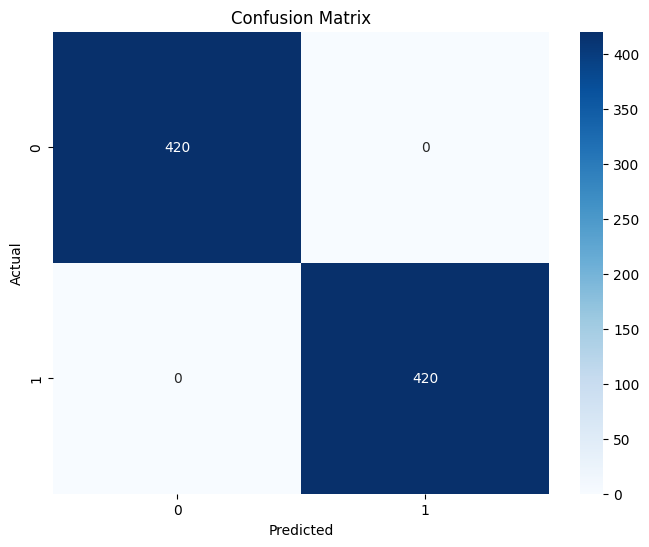

In [25]:
y_pred_encoded = best_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)
y_test = le.inverse_transform(y_test_encoded)

print("\nBest Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The Bio-Fertilizer Recommendation System takes soil and environmental data as input and predicts the most suitable bio-fertilizer along with its recommended dosage. First, crop and fertilizer datasets are loaded and preprocessed, mapping crops to bio-fertilizers and filling missing labels. Nutrient ratio features (N/P, N/K, P/K) are engineered to enhance model learning. Numeric features are scaled, and the target labels are encoded for balancing using SMOTE to handle class imbalance. The dataset is then split into training and testing sets. A Random Forest classifier is trained with hyperparameter tuning via GridSearchCV. The model is evaluated using accuracy, classification metrics, and a confusion matrix. Finally, an interactive input interface allows users to provide soil and environmental values, which are processed and scaled before being passed to the trained model to predict the recommended bio-fertilizer and its dosage.